In [3]:
import sympy as sym
import numpy as np

In [12]:
sym.init_printing()

We want the variance of $(\sigma^2_{t+1})^2$ (It equals the variance of $\sigma^2_{t+1}$. By the variance decomposition this equals $\mathbb{E}[\sigma^8_{t+1} | \sigma^2_t]  - \mathbb{E}[\sigma^4_{t+1} | \sigma^2_t]^2$.

The first term is the 4rth-moment of the volatility. We can compute this using the fact that Laplace transforms generate the moments through differentation.

$\mathbb{E}[\sigma^8_{t+1} | \sigma^2_t]
= (-1)^4 \frac{\partial^4}{\partial x^4} \mathbb{E}[\exp(- (-x) \sigma^2_{t+1}) | \sigma^2_t)]
= \frac{\partial^4}{\partial x^4} \exp\left(-A(-x) \sigma^2_t - B(-x)\right) |_{x=0}
= -\frac{\partial^4}{\partial x^4} A(-x) \sigma^2_t - \frac{\partial x^4}{\partial x^4} B(-x) |_{x=0}$


In [8]:
sym.__version__

'1.3'

In [51]:
x, y = sym.symbols('x y')
rho, c, delta = sym.symbols('rho c delta')
sigma2 = sym.symbols('sigma^2_t')

In [52]:
A =  (rho * x) / (1 + c * x)
B = delta * sym.log(1 + c * x)

In [53]:
fourth_moment = (- A.replace(x, -x).diff(x, 4).replace(x,0) * sigma2
                 - B.replace(x,-x).diff(x,4).replace(x,0)).simplify()

In [54]:
fourth_moment

Similarly, the 2nd-moment of the volatility as a similar expression, we just replace the 4 with a 2.

In [55]:
second_moment = (- A.replace(x, -x).diff(x, 2).replace(x,0) * sigma2
                 - B.replace(x,-x).diff(x,2).replace(x,0)).simplify()

In [67]:
variance_variance = sym.factor(fourth_moment - second_moment**2)

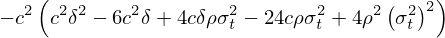

In [68]:
variance_variance

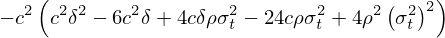

In [69]:
variance_variance.factor()